In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import preprocessing
from scipy.io import arff
import time

In [71]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [72]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [73]:
print(df.head(10).to_csv("heartfailure.csv", index =False))

None


In [74]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [76]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

## Count of how many patients have a heart failure 

In [77]:
count = df.DEATH_EVENT.value_counts()
count

0    203
1     96
Name: DEATH_EVENT, dtype: int64

## Bar plot 

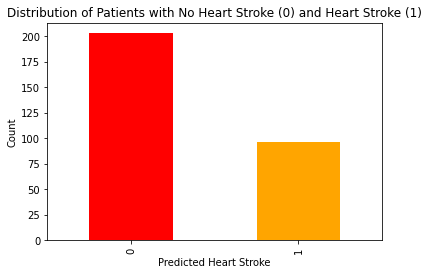

In [78]:
count.plot(kind='bar', color=['red', 'orange'])
plt.title("Distribution of Patients with No Heart Stroke (0) and Heart Stroke (1)")
plt.xlabel("Predicted Heart Stroke")
plt.ylabel("Count");

## Pie Plot

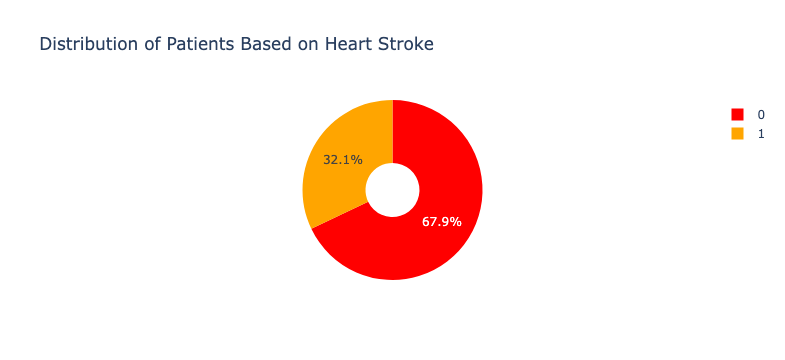

In [79]:
heart_pred = df['DEATH_EVENT'].value_counts()

heart_label = heart_pred.index
heart_size = heart_pred.values

colors = ['red', 'orange']

trace = go.Pie(labels = heart_label,
              values = heart_size,
               marker = dict(colors = colors),
               hole = 0.3
              )
dataset = [trace]
layout = go.Layout(title = 'Distribution of Patients Based on Heart Stroke')

fig = go.Figure(data = dataset, layout = layout)
py.iplot(fig)

## Scatter Plot of age vs. smoking impact on heart failure

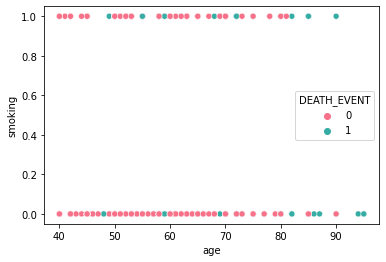

In [80]:
sns.scatterplot(x='age', y = 'smoking', data = df, hue = 'DEATH_EVENT', palette='husl');

## Gender count

In [81]:
gender = df.groupby('sex')['DEATH_EVENT'].count()
gender

sex
0    105
1    194
Name: DEATH_EVENT, dtype: int64

## Gender Count and Smoking impact on heart failure

<AxesSubplot:xlabel='sex', ylabel='smoking'>

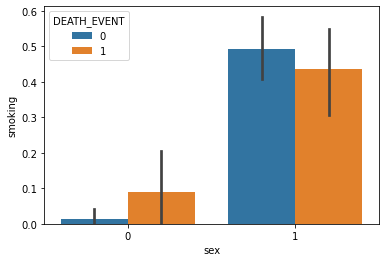

In [87]:
sns.barplot(x='sex', y ='smoking', hue = 'DEATH_EVENT', data = df)

<AxesSubplot:xlabel='sex', ylabel='age'>

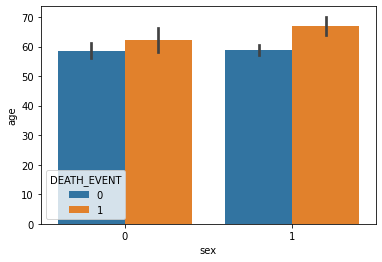

In [88]:
sns.barplot(x='sex', y ='age', hue = 'DEATH_EVENT', data = df)

<AxesSubplot:xlabel='smoking', ylabel='age'>

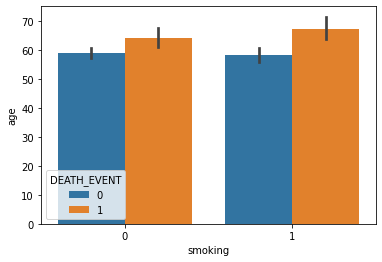

In [89]:
sns.barplot(x='smoking', y ='age', hue = 'DEATH_EVENT', data = df)

## Similar Bar plot as above, but different style

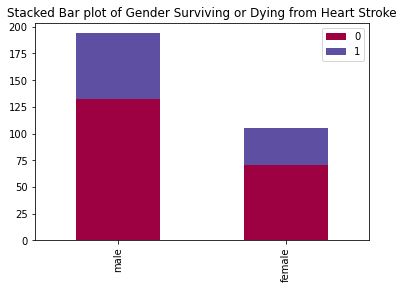

In [83]:
survived = df.loc[df['sex']==1, :]['DEATH_EVENT'].value_counts()
died     = df.loc[df['sex']==0, :]['DEATH_EVENT'].value_counts()
df_plot  = pd.DataFrame([survived,died])
df_plot.index=['male','female']

# Bar plot
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot of Gender Surviving or Dying from Heart Stroke');

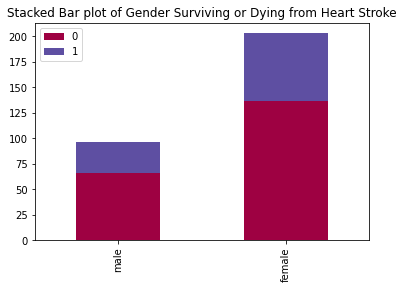

In [84]:
survived = df.loc[df['smoking']==1, :]['DEATH_EVENT'].value_counts()
died     = df.loc[df['smoking']==0, :]['DEATH_EVENT'].value_counts()
df_plot  = pd.DataFrame([survived,died])
df_plot.index=['male','female']

# Bar plot
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot of Gender Surviving or Dying from Heart Stroke');

Value Counts 1    194
0    105
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

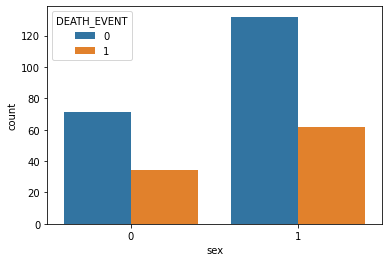

In [62]:
## better plots to use for the paper, because it separate the genders properly
print('Value Counts',df['sex'].value_counts())
sns.countplot(data=df,x='sex',hue='DEATH_EVENT')

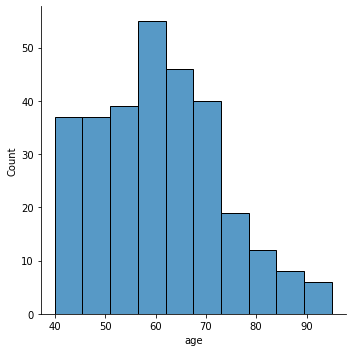

In [48]:
# distribution plot of age
sns.displot(df['age'])

AxesSubplot(0.125,0.125;0.775x0.755)


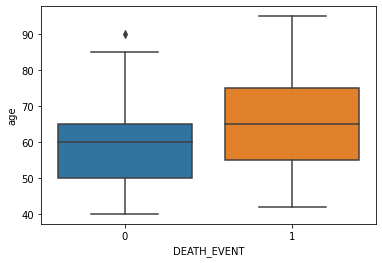

In [49]:
# boxplot of age and impact of heart failure
print(sns.boxplot(data=df,x='DEATH_EVENT',y='age'))

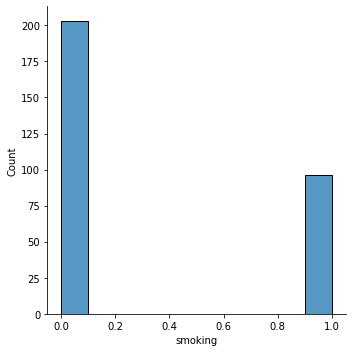

In [64]:
# distribution plot of smoking 
sns.displot(df['smoking'])

AxesSubplot(0.125,0.125;0.775x0.755)


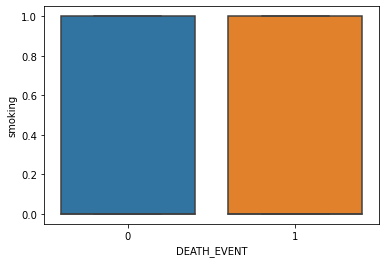

In [66]:
# boxplot of smoking and impact of heart failure
print(sns.boxplot(data=df,x='DEATH_EVENT',y='smoking'))

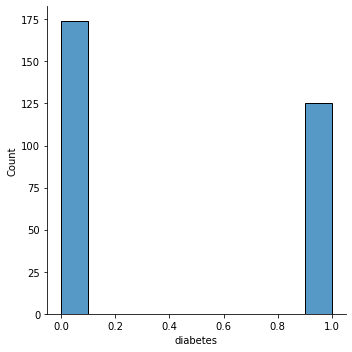

In [54]:
# distribution plot of diabetes 
sns.displot(df['diabetes'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='diabetes'>

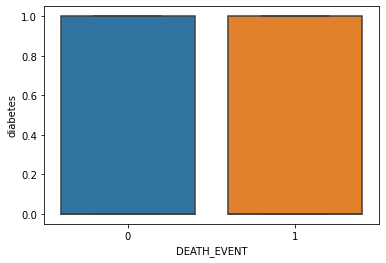

In [56]:
# boxplot of diabetes and impact of heart failure
sns.boxplot(data=df,x='DEATH_EVENT',y='diabetes')

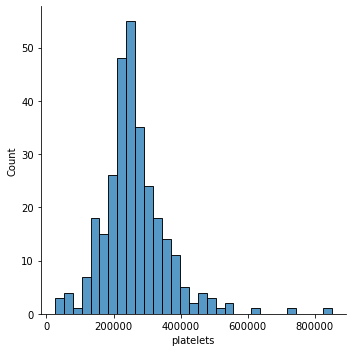

In [58]:
#distibution plot of platelets
sns.displot(df['platelets'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

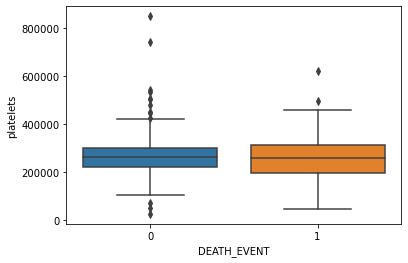

In [60]:
# boxplot of platelets and impact of heart failure
sns.boxplot(data=df,x='DEATH_EVENT',y='platelets')

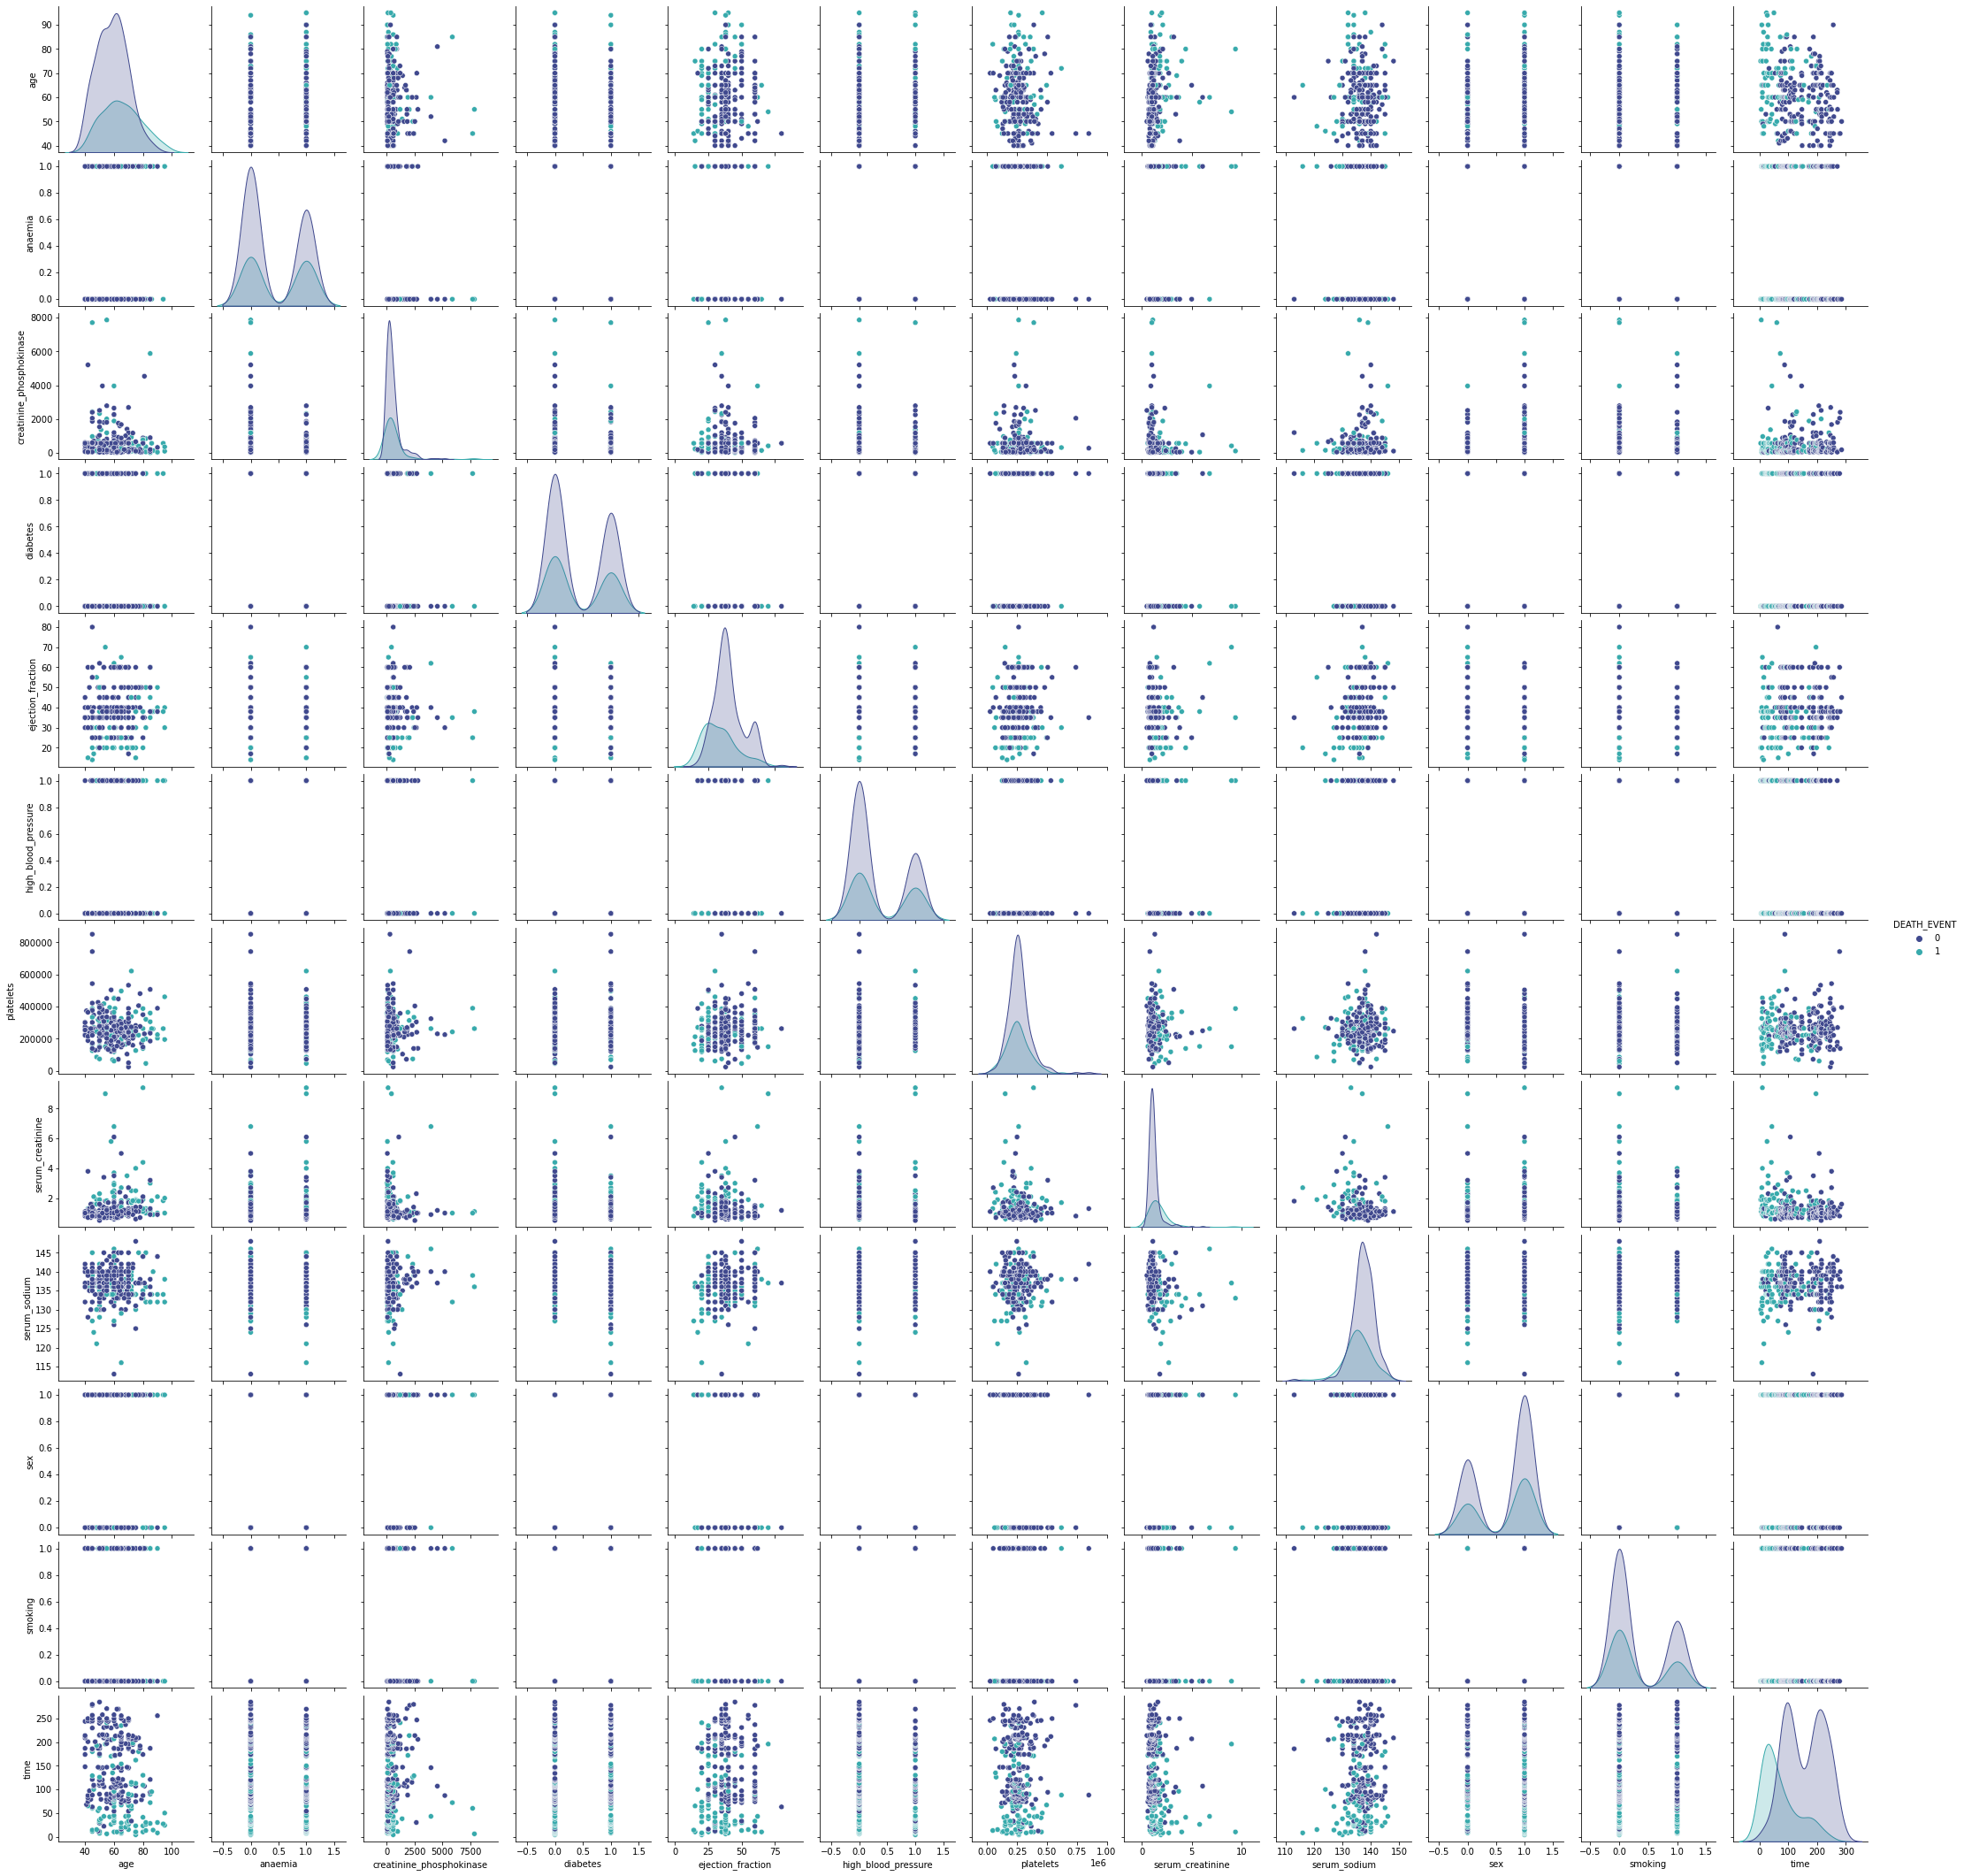

In [90]:
#data visulaization using scatter plot, for the columns, will create a pair plot
cols = ['age', 'anaemia', 
        'creatinine_phosphokinase','diabetes', 
        'ejection_fraction','high_blood_pressure',
        'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
sns.pairplot(data = df[cols], hue = 'DEATH_EVENT', palette ='mako')
plt.savefig('pairplot')

## Correlation Matrix

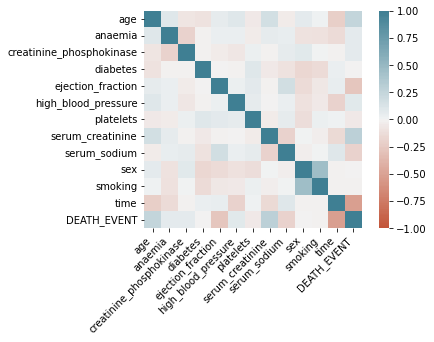

In [16]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Replacing Missing values - In case if any missing and will be replaced with the mean of the column

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:])
X[:,1:]=imputer.transform(X[:,1:])

In [18]:
print(X)

[[0.000e+00 5.820e+02 0.000e+00 ... 1.000e+00 0.000e+00 4.000e+00]
 [0.000e+00 7.861e+03 0.000e+00 ... 1.000e+00 0.000e+00 6.000e+00]
 [0.000e+00 1.460e+02 0.000e+00 ... 1.000e+00 1.000e+00 7.000e+00]
 ...
 [0.000e+00 2.060e+03 1.000e+00 ... 0.000e+00 0.000e+00 2.780e+02]
 [0.000e+00 2.413e+03 0.000e+00 ... 1.000e+00 1.000e+00 2.800e+02]
 [0.000e+00 1.960e+02 0.000e+00 ... 1.000e+00 1.000e+00 2.850e+02]]


In [19]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


## Split dataset to training and testing set

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
print(X_train)

[[1.000e+00 1.300e+02 0.000e+00 ... 1.000e+00 1.000e+00 1.210e+02]
 [0.000e+00 6.600e+01 0.000e+00 ... 1.000e+00 0.000e+00 2.330e+02]
 [1.000e+00 1.021e+03 1.000e+00 ... 1.000e+00 0.000e+00 1.970e+02]
 ...
 [0.000e+00 5.882e+03 0.000e+00 ... 1.000e+00 1.000e+00 7.200e+01]
 [1.000e+00 1.090e+02 0.000e+00 ... 1.000e+00 0.000e+00 2.090e+02]
 [1.000e+00 8.550e+02 1.000e+00 ... 0.000e+00 0.000e+00 3.000e+01]]


In [22]:
print(X_test)

[[1.0000000e+00 1.1500000e+02 0.0000000e+00 2.0000000e+01 0.0000000e+00
  1.8900000e+05 8.0000000e-01 1.3900000e+02 1.0000000e+00 0.0000000e+00
  1.4600000e+02]
 [0.0000000e+00 5.8200000e+02 1.0000000e+00 5.5000000e+01 0.0000000e+00
  5.4300000e+05 1.0000000e+00 1.3200000e+02 0.0000000e+00 0.0000000e+00
  2.5000000e+02]
 [1.0000000e+00 9.1000000e+01 0.0000000e+00 2.0000000e+01 1.0000000e+00
  4.1800000e+05 1.4000000e+00 1.3900000e+02 0.0000000e+00 0.0000000e+00
  4.3000000e+01]
 [0.0000000e+00 1.3200000e+02 0.0000000e+00 3.0000000e+01 0.0000000e+00
  2.1800000e+05 7.0000000e-01 1.3600000e+02 1.0000000e+00 1.0000000e+00
  1.1200000e+02]
 [1.0000000e+00 1.3500000e+02 0.0000000e+00 3.5000000e+01 1.0000000e+00
  2.9000000e+05 8.0000000e-01 1.3400000e+02 1.0000000e+00 0.0000000e+00
  1.9400000e+02]
 [0.0000000e+00 1.6700000e+02 0.0000000e+00 3.0000000e+01 0.0000000e+00
  2.5900000e+05 8.0000000e-01 1.3800000e+02 0.0000000e+00 0.0000000e+00
  1.8600000e+02]
 [1.0000000e+00 2.5700000e+02 1.00

In [23]:
print(y_train)

[0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]


In [24]:
print(y_test)

[0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0]


## Feature Scaling using Standardization Method

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
print(X_train)

[[ 1.11069566 -0.4576634  -0.84818893 ...  0.72941845  1.52297224
  -0.10575054]
 [-0.90033664 -0.51894319 -0.84818893 ...  0.72941845 -0.65661079
   1.33189826]
 [ 1.11069566  0.39546617  1.17898261 ...  0.72941845 -0.65661079
   0.86979686]
 ...
 [-0.90033664  5.04985768 -0.84818893 ...  0.72941845  1.52297224
  -0.73472189]
 [ 1.11069566 -0.47777083 -0.84818893 ...  0.72941845 -0.65661079
   1.02383066]
 [ 1.11069566  0.23652172  1.17898261 ... -1.37095517 -0.65661079
  -1.27384019]]


In [27]:
print(X_test)

[[ 1.11069566 -0.47202585 -0.84818893 -1.5048338  -0.72269841 -0.73096394
  -0.58084862  0.51465589  0.72941845 -0.65661079  0.21515321]
 [-0.90033664 -0.02487488  1.17898261  1.43902371 -0.72269841  3.09767621
  -0.39670905 -1.02287857 -1.37095517 -0.65661079  1.55011281]
 [ 1.11069566 -0.49500577 -0.84818893 -1.5048338   1.38370306  1.74575525
  -0.02842992  0.51465589 -1.37095517 -0.65661079 -1.10697024]
 [-0.90033664 -0.4557484  -0.84818893 -0.66373165 -0.72269841 -0.41731828
  -0.67291841 -0.14428745  0.72941845  1.52297224 -0.22127589]
 [ 1.11069566 -0.45287591 -0.84818893 -0.24318058  1.38370306  0.36138819
  -0.58084862 -0.58358301  0.72941845 -0.65661079  0.83128841]
 [-0.90033664 -0.42223602 -0.84818893 -0.66373165 -0.72269841  0.0261118
  -0.58084862  0.29500811 -1.37095517 -0.65661079  0.72859921]
 [ 1.11069566 -0.33606131  1.17898261 -0.66373165 -0.72269841 -1.15276328
  -0.39670905  0.07536033  0.72941845  1.52297224  1.48593206]
 [-0.90033664 -0.47777083 -0.84818893 -0.2

### Training the Logistic Regression model on the Training set

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Results of Logistic Regression Model - Confusion Matrix and Accuracy Score

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac=accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic Regression is: " + str(ac *100) +" %")

[[42  4]
 [ 4 10]]
Accuracy Score for Logistic Regression is: 86.66666666666667 %


### Training the K-NN model on the Training set

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Results of KNN Model - Confusion Matrix and Accuracy Score

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac=accuracy_score(y_test, y_pred)
print("Accuracy Score for K- Nearest Neighbor is: " + str(ac *100) +" %")

[[42  4]
 [ 8  6]]
Accuracy Score for K- Nearest Neighbor is: 80.0 %
